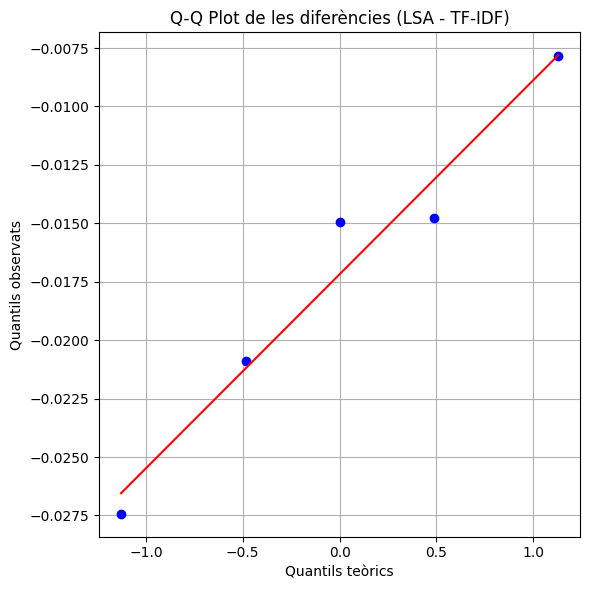

In [ ]:
# Importació de llibreries per a càlcul numèric, estadística i gràfics

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd  # ← Necessari per crear la taula final

# Valors reals d'AUC-ROC per a dos models: TF-IDF i LDA
# (cada llista conté els resultats per a 5 folds de validació creuada)

auc_tfidf = [
    0.9914700435601005,
    0.9903283656763467,
    0.9891287077837895,
    0.9942759542752444,
    0.9922045568934963]

auc_lda = [
    0.9640405288040741,
    0.9694402047235843,
    0.98127959001195,
    0.9795027103225513,
    0.9772453506913165]

# Càlcul de les diferències parell a parell entre LDA i TF-IDF
# (per observar quin model ofereix millors resultats en cada fold)

diferencies = [a - b for a, b in zip(auc_lda, auc_tfidf)]

# Q-Q Plot: comprovació gràfica de la normalitat de les diferències
# Aquest gràfic compara els quantils observats amb els d’una distribució normal teòrica

plt.figure(figsize=(6, 6))
stats.probplot(diferencies, dist="norm", plot=plt)
plt.title("Q-Q Plot de les diferències (LDA - TF-IDF)")
plt.xlabel("Quantils teòrics")
plt.ylabel("Quantils observats")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

# Càlcul del test t de Student per dades aparellades (ttest_rel)
# Objectiu: comprovar si la diferència mitjana entre LDA i TF-IDF és estadísticament significativa

from scipy.stats import ttest_rel


# Aplicació del test t aparellat per comparar LDA vs TF-IDF
t_statistic_real, p_value_real = ttest_rel(auc_lda, auc_tfidf)

# Creació d’una taula comparativa amb les mètriques i diferències

df_real = pd.DataFrame({
    "Fold": list(range(1, 6)),  # Nombres de particions (folds)
    "AUC_TFIDF": auc_tfidf,  # Resultats TF-IDF
    "AUC_LDA": auc_lda,      # Resultats LDA
    "Diferència (LDA - TF-IDF)": [a - b for a, b in zip(auc_lda, auc_tfidf)]
})

# Resultat final del test t
# t_statistic_real: valor de la t
# p_value_real: valor p associat (serveix per decidir si la diferència és significativa)

t_statistic_real, p_value_real


(np.float64(-5.220503031816293), np.float64(0.006425258354856111))